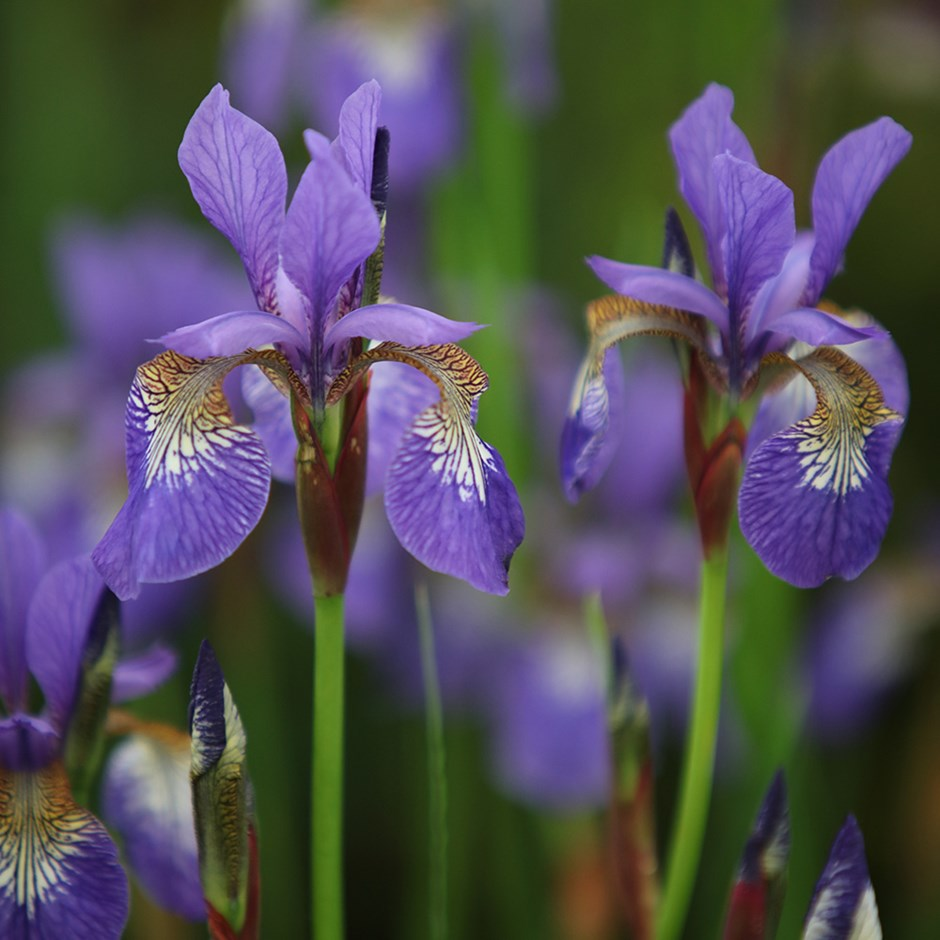

In [56]:
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [57]:
# load Iris Flower dataset
iris = pd.read_csv('Iris.csv')

In [58]:
iris.tail(9)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [59]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

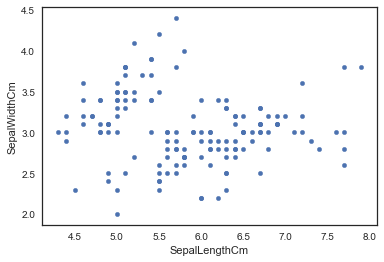

In [60]:
iris.plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm') # use this to make a scatterplot of the Iris features.

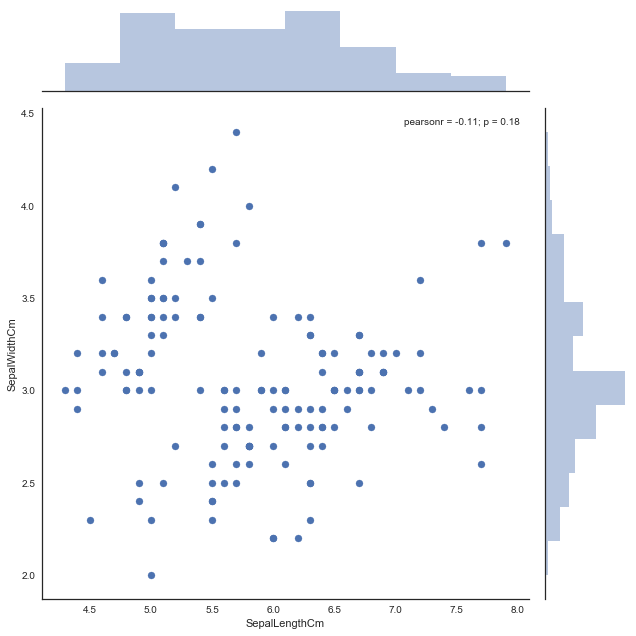

In [61]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm', data=iris, size=9)

In [62]:
iris.shape


(150, 6)

In [63]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


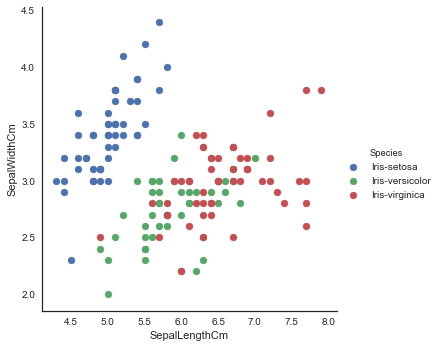

In [64]:
# use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue = 'Species', size=5) \
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
    .add_legend()

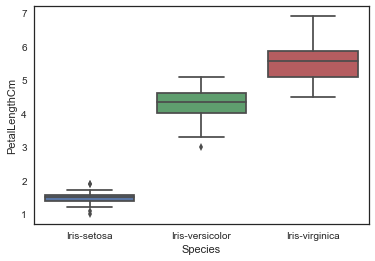

In [65]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

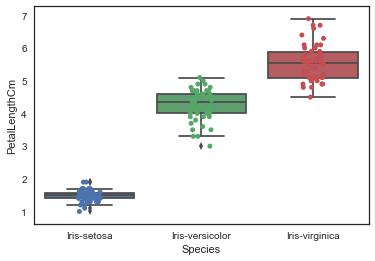

In [66]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(data=iris, x = 'Species',y = 'PetalLengthCm')
ax = sns.stripplot(data=iris, x='Species', y='PetalLengthCm', jitter=True, edgecolor='green')

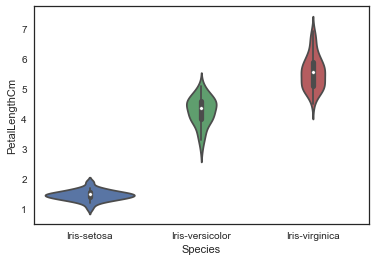

In [67]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x='Species',y='PetalLengthCm', data=iris, size=6)   

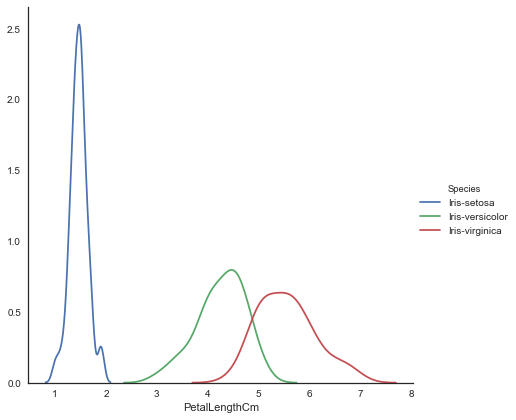

In [68]:
# A useful seaborn plot for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [69]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


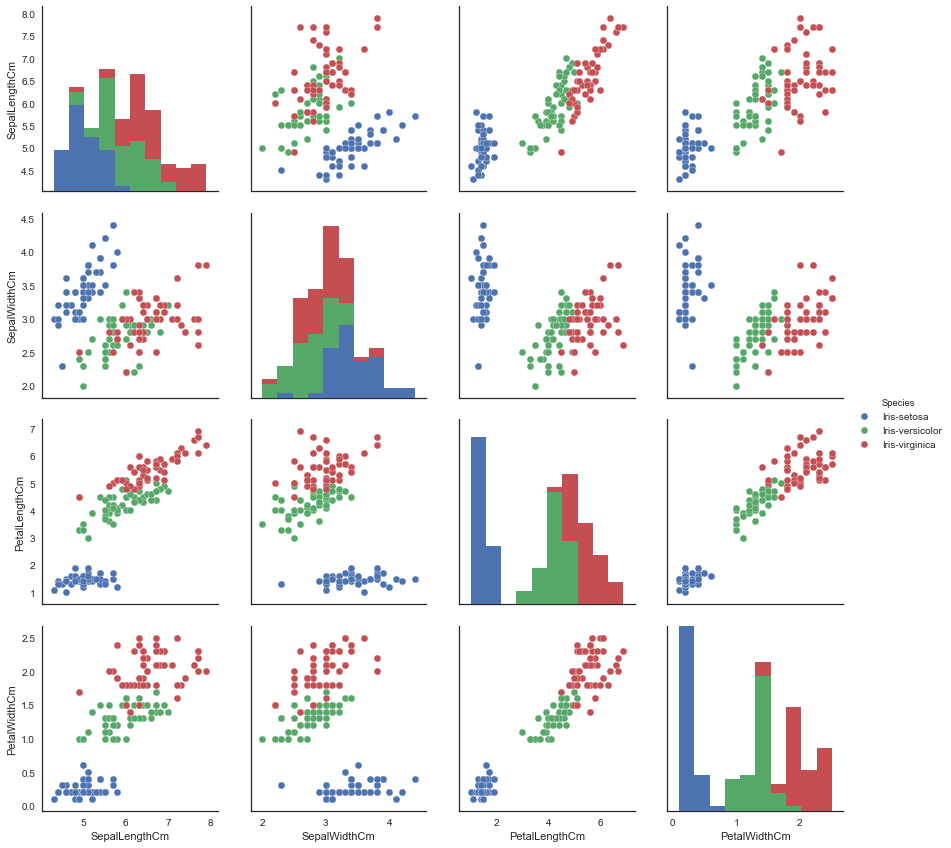

In [70]:
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3)

Another useful seaborn plot is the pairplot, which shows the bivariate relation
between each pair of features

From the pairplot, we'll see that the Iris-setosa species is separataed from the other
two across all feature combinations

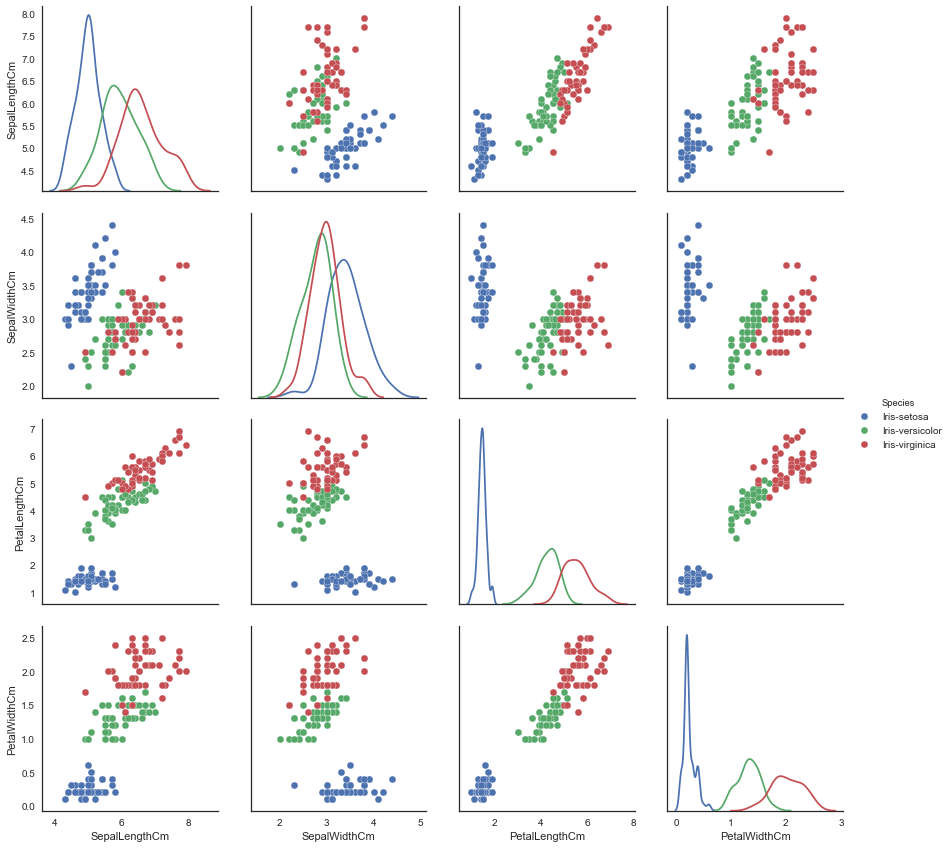

In [71]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde

sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3, diag_kind='kde')

https://seaborn.pydata.org/generated/seaborn.pairplot.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC3609EBA8>,
      dtype=object)

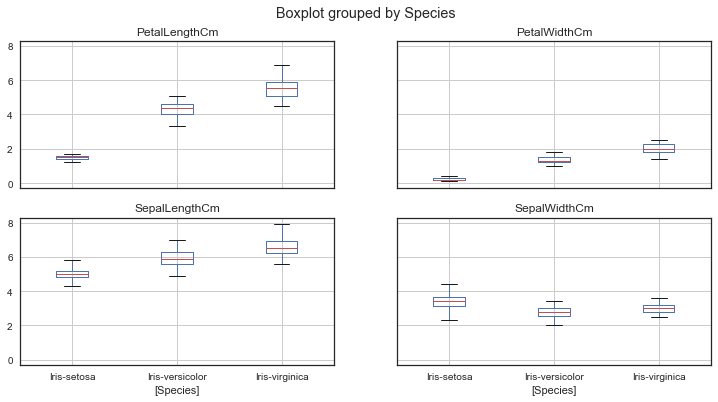

In [72]:
# make a boxplot with Pandas on each feature split out by species

iris.drop('Id', axis=1).boxplot(by='Species', figsize=(12,6))

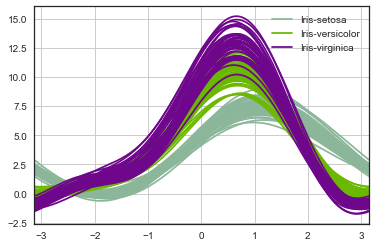

In [73]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

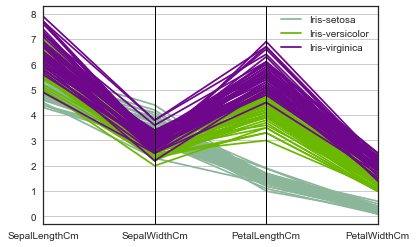

In [74]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

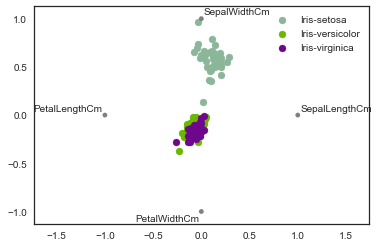

In [75]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

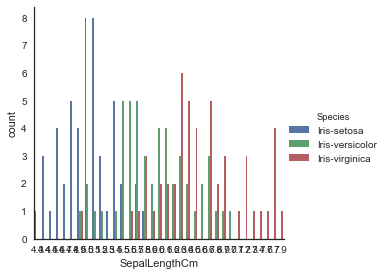

In [76]:
sns.factorplot('SepalLengthCm', data=iris, hue='Species', kind='count' )

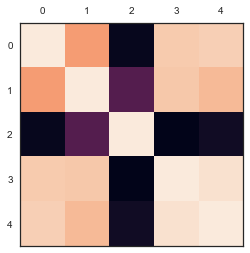

In [77]:
plt.matshow(iris.corr())

In [99]:
iriscorr = iris.drop(columns=["Id"]).corr()

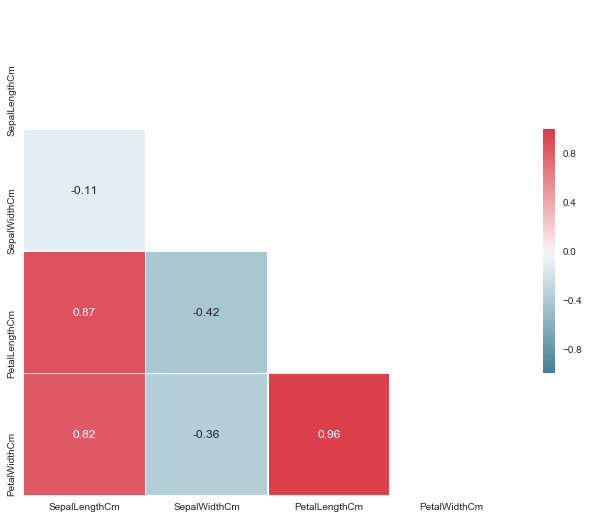

In [110]:
mask = np.zeros_like(iriscorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(iriscorr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [103]:
iriscorr.style.background_gradient()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1
